In [3]:
#pip install matplotlib numpy


SyntaxError: invalid syntax (3432248525.py, line 2)

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

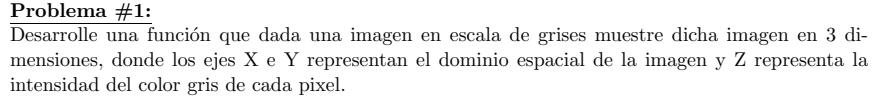

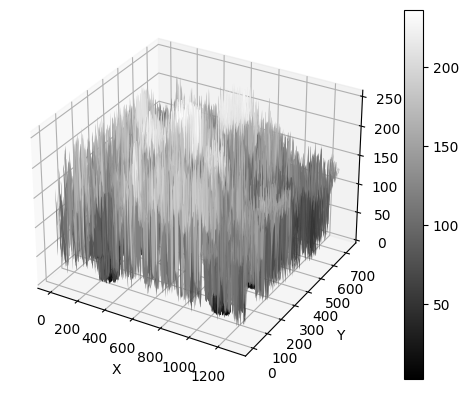

In [6]:
def mostrar_imagen_3d(imagen_gris):
    # Obtener dimensiones de la imagen
    alto, ancho = imagen_gris.shape
    
    # Crear malla de coordenadas X e Y
    x = np.arange(0, ancho, 1)
    y = np.arange(0, alto, 1)
    x, y = np.meshgrid(x, y)
    
    # Crear una figura 3D
    figura = plt.figure()
    eje_3d = figura.add_subplot(111, projection='3d')
    
    # Convertir la imagen en una matriz de coordenadas Z
    z = imagen_gris
    
    # Graficar la superficie 3D
    superficie = eje_3d.plot_surface(x, y, z, cmap='gray')
    
    # Agregar barra de colores
    figura.colorbar(superficie, ax=eje_3d)
    
    # Etiquetas de ejes
    eje_3d.set_xlabel('X')
    eje_3d.set_ylabel('Y')
    eje_3d.set_zlabel('Intensidad')
    
    # Mostrar la figura
    plt.show()


imagen_gris = plt.imread('/workspaces/Text-mining-n-image-recogn/Guipil.jpeg')[:,:,0]
mostrar_imagen_3d(imagen_gris)


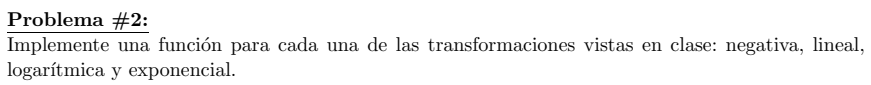

/tmp/ipykernel_5806/2366811926.py:28: RuntimeWarning: divide by zero encountered in log
  imagen_transformada = c * np.log(1 + imagen_gris)


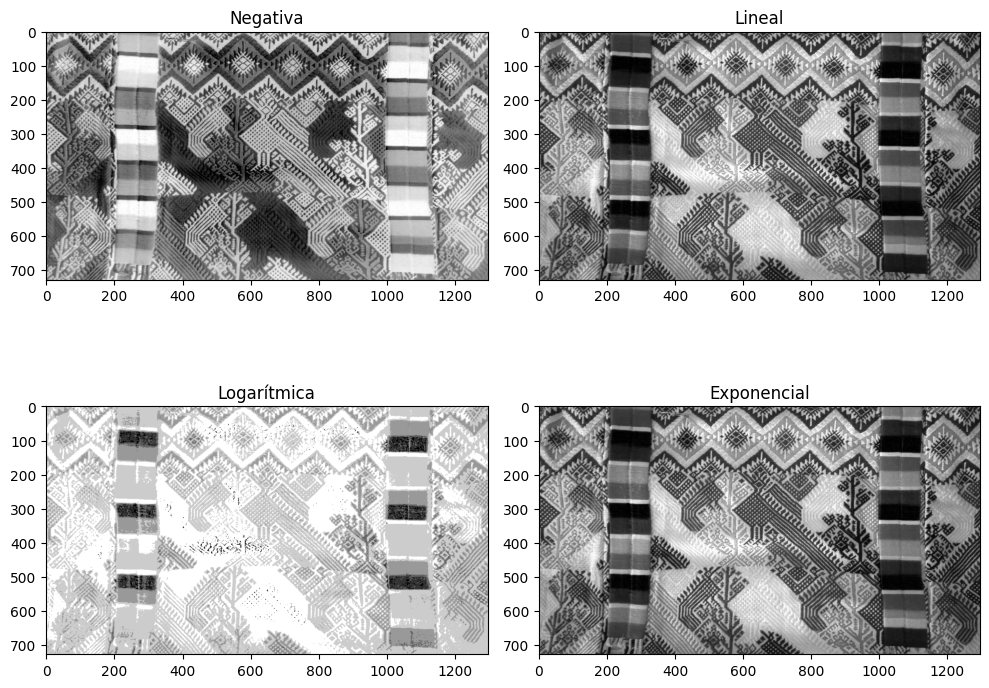

In [8]:
def negativa(imagen_gris):
    imagen_transformada = 255 - imagen_gris
    return imagen_transformada

def lineal(imagen_gris, pendiente, interseccion):
    """
    Aplica la transformación lineal a una imagen en escala de grises.
    
    Args:
    imagen_gris (numpy.ndarray): La imagen en escala de grises representada como una matriz numpy.
    pendiente (float): La pendiente de la línea de transformación.
    interseccion (float): El término de intersección de la línea de transformación.
    """
    imagen_transformada = np.clip(pendiente * imagen_gris + interseccion, 0, 255)
    return imagen_transformada.astype(np.uint8)

def logaritmica(imagen_gris, c):
    """
    Aplica la transformación logarítmica a una imagen en escala de grises.
    
    Args:
    imagen_gris (numpy.ndarray): La imagen en escala de grises representada como una matriz numpy.
    c (float): Parámetro de ajuste para la transformación logarítmica.
    
    Returns:
    numpy.ndarray: La imagen transformada.
    """
    imagen_transformada = c * np.log(1 + imagen_gris)
    imagen_transformada = np.clip(imagen_transformada, 0, 255)
    return imagen_transformada.astype(np.uint8)

def exponencial(imagen_gris, c, gamma):
    """
    Aplica la transformación exponencial a una imagen en escala de grises.
    
    Args:
    imagen_gris (numpy.ndarray): La imagen en escala de grises representada como una matriz numpy.
    c (float): Parámetro de ajuste para la transformación exponencial.
    gamma (float): Parámetro de ajuste para controlar la curvatura de la transformación.
    
    Returns:
    numpy.ndarray: La imagen transformada.
    """
    imagen_transformada = c * np.power(imagen_gris, gamma)
    imagen_transformada = np.clip(imagen_transformada, 0, 255)
    return imagen_transformada.astype(np.uint8)

imagen_gris = plt.imread('/workspaces/Text-mining-n-image-recogn/Guipil.jpeg')[:,:,0]

# Aplicar las transformaciones
imagen_negativa = negativa(imagen_gris)
imagen_lineal = lineal(imagen_gris, pendiente=1, interseccion=0)
imagen_logaritmica = logaritmica(imagen_gris, c=1)
imagen_exponencial = exponencial(imagen_gris, c=1, gamma=1)

# Mostrar las imágenes transformadas
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(imagen_negativa, cmap='gray')
plt.title('Negativa')

plt.subplot(2, 2, 2)
plt.imshow(imagen_lineal, cmap='gray')
plt.title('Lineal')

plt.subplot(2, 2, 3)
plt.imshow(imagen_logaritmica, cmap='gray')
plt.title('Logarítmica')

plt.subplot(2, 2, 4)
plt.imshow(imagen_exponencial, cmap='gray')
plt.title('Exponencial')

plt.tight_layout()
plt.show()


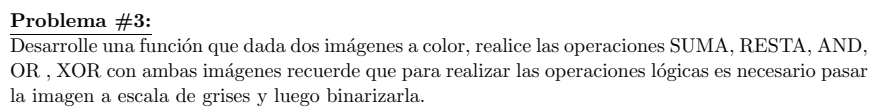

In [4]:
def color_operations(image1, image2):
    """
    Realiza operaciones lógicas en imágenes a color: SUMA, RESTA, AND, OR, XOR.
    
    Args:
    image1 (numpy.ndarray): La primera imagen a color representada como una matriz numpy.
    image2 (numpy.ndarray): La segunda imagen a color representada como una matriz numpy.
    """
    # Convertir las imágenes a escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Binarizar las imágenes (usando umbral de 128 para obtener valores binarios)
    _, binary_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, binary_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)
    
    # Realizar operaciones lógicas
    bitwise_and = cv2.bitwise_and(binary_image1, binary_image2)
    bitwise_or = cv2.bitwise_or(binary_image1, binary_image2)
    bitwise_xor = cv2.bitwise_xor(binary_image1, binary_image2)
    
    # Sumar las imágenes (usando saturación para evitar desbordamientos)
    sum_image = cv2.add(image1, image2)
    
    # Restar las imágenes (usando saturación para evitar valores negativos)
    subtract_image = cv2.subtract(image1, image2)
    
    # Mostrar las imágenes resultantes
    plt.figure(figsize=(12, 10))
    
    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title('Imagen 1')
    
    plt.subplot(3, 3, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('Imagen 2')
    
    plt.subplot(3, 3, 3)
    plt.imshow(cv2.cvtColor(sum_image, cv2.COLOR_BGR2RGB))
    plt.title('Suma')
    
    plt.subplot(3, 3, 4)
    plt.imshow(cv2.cvtColor(subtract_image, cv2.COLOR_BGR2RGB))
    plt.title('Resta')
    
    plt.subplot(3, 3, 5)
    plt.imshow(binary_image1, cmap='gray')
    plt.title('Binarizada 1')
    
    plt.subplot(3, 3, 6)
    plt.imshow(binary_image2, cmap='gray')
    plt.title('Binarizada 2')
    
    plt.subplot(3, 3, 7)
    plt.imshow(bitwise_and, cmap='gray')
    plt.title('AND')
    
    plt.subplot(3, 3, 8)
    plt.imshow(bitwise_or, cmap='gray')
    plt.title('OR')
    
    plt.subplot(3, 3, 9)
    plt.imshow(bitwise_xor, cmap='gray')
    plt.title('XOR')
    
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# Cargar dos imágenes a color (asegúrate de proporcionar las rutas correctas)
image1 = cv2.imread('ruta_de_la_imagen1.png')
image2 = cv2.imread('ruta_de_la_imagen2.png')

# Aplicar las operaciones lógicas
color_operations(image1, image2)


NameError: name 'cv2' is not defined